# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
data = pd.read_csv(r'C:\Users\claud\lab-customer-analysis-round-4\files_for_lab\csv_files\marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# Standardizing header by removing spaces and capital letters
data.columns = [x.strip(' ').lower() for x in data.columns]

In [5]:
# Checking NaN values
data.isnull().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [6]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [7]:
# numeric data into dataframe called numerical
numerical = data.select_dtypes(include=[np.number])

# categorical data into dataframe called categoricals
categoricals = data.select_dtypes(include=[np.object])

### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


In [11]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


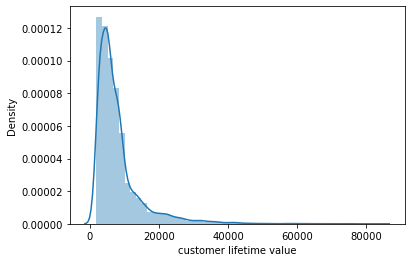

In [12]:
# Use seaborn library to construct distribution plots for the numerical variables
sns.distplot(numerical['customer lifetime value'])
plt.show()

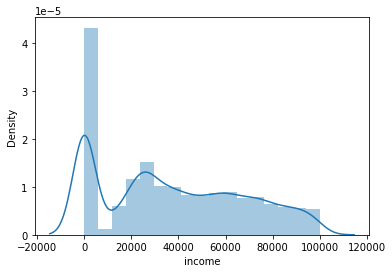

In [13]:
sns.distplot(numerical['income'])
plt.show()

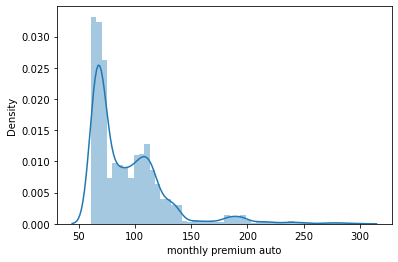

In [14]:
sns.distplot(numerical['monthly premium auto'])
plt.show()

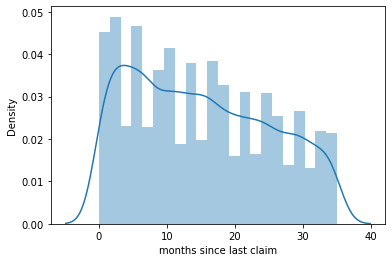

In [15]:
sns.distplot(numerical['months since last claim'])
plt.show()

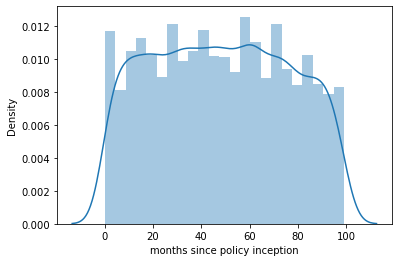

In [16]:
sns.distplot(numerical['months since policy inception'])
plt.show() 

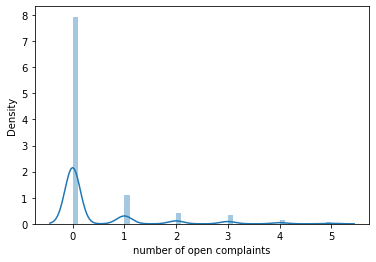

In [17]:
sns.distplot(numerical['number of open complaints'])
plt.show() 

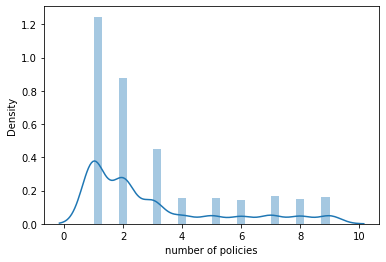

In [18]:
sns.distplot(numerical['number of policies'])
plt.show() 

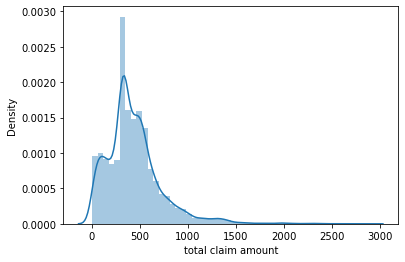

In [19]:
sns.distplot(numerical['total claim amount'])
plt.show() 

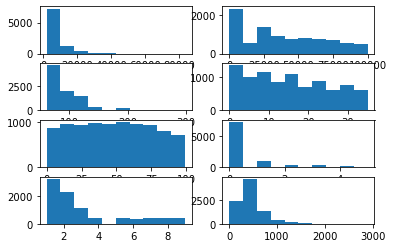

In [20]:
# multiple plots in the same space

fig, axs = plt.subplots(4, 2)

axs[0, 0].hist(numerical['customer lifetime value'])
axs[0, 1].hist(numerical['income'])
axs[1, 0].hist(numerical['monthly premium auto'])
axs[1, 1].hist(numerical['months since last claim'])
axs[2, 0].hist(numerical['months since policy inception'])
axs[2, 1].hist(numerical['number of open complaints'])
axs[3, 0].hist(numerical['number of policies'])
axs[3, 1].hist(numerical['total claim amount'])

plt.show()

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [22]:
X = numerical.drop(['total claim amount'], axis=1)
y = data['total claim amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:36:31   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

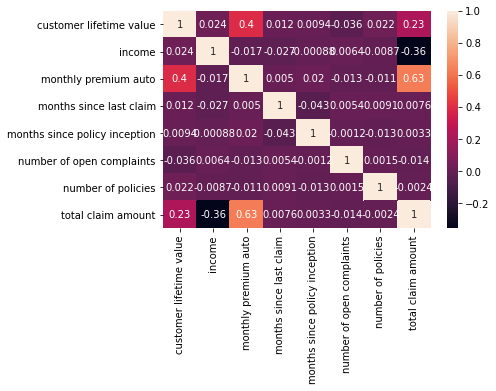

In [23]:
correlations_matrix = numerical.corr()
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [24]:
Markdown LaTeX: 𝛼2

SyntaxError: invalid syntax (<ipython-input-24-883204237f1d>, line 1)

In this exercise I couldn't understand the markdowns above saying: "Type Markdown and LaTeX:  𝛼2.
Besides that, I didn't find a correlation greater than 0.9 in the heatmap, so I tested considering the p-value column from the summary.
Which means that I droped the variables with a p-value < 0.05: 'customer lifetime value', 'income', 'monthly premium auto'.
Comparing the summaries droping each of teh variables above mentiones, it was possible to check that as lower as the p-value is, when we drop the variable we have a lower R2.

In [25]:
# Droping 'customer lifetime value'
X = numerical.drop(['total claim amount', 'customer lifetime value'], axis=1)
y = data['total claim amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1638.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:56:54   Log-Likelihood:                -61427.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9127   BIC:                         1.229e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [26]:
correlations_matrix_dropcustomer = numerical.drop(['customer lifetime value'], axis=1).corr()
correlations_matrix_dropcustomer

,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


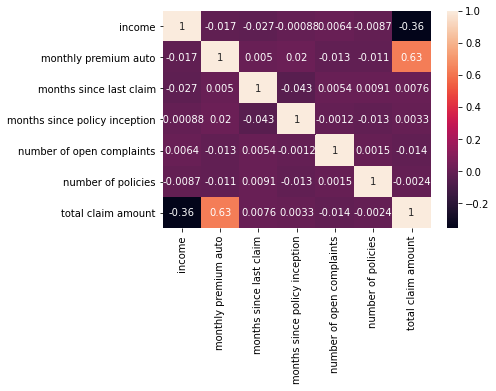

In [27]:
sns_plot = sns.heatmap(correlations_matrix_dropcustomer, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()

In [28]:
# Droping 'income'
X = numerical.drop(['total claim amount', 'income'], axis=1)
y = data['total claim amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     1015.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:57:40   Log-Likelihood:                -62429.
No. Observations:                9134   AIC:                         1.249e+05
Df Residuals:                    9127   BIC:                         1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [29]:
correlations_matrix_dropincome = numerical.drop(['income'], axis=1).corr()
correlations_matrix_dropincome

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
monthly premium auto,0.396262,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


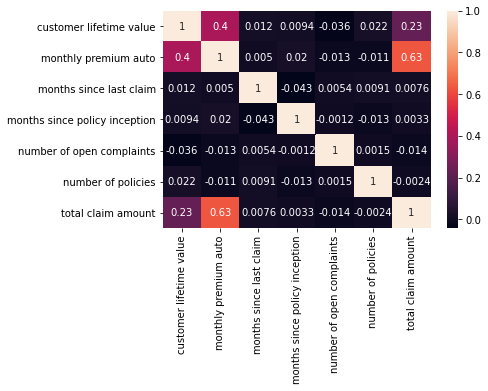

In [30]:
sns_plot = sns.heatmap(correlations_matrix_dropincome, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()

In [31]:
# Droping 'monthly premium auto'
X = numerical.drop(['total claim amount', 'monthly premium auto'], axis=1)
y = data['total claim amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     337.7
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:58:48   Log-Likelihood:                -63849.
No. Observations:                9134   AIC:                         1.277e+05
Df Residuals:                    9127   BIC:                         1.278e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [32]:
correlations_matrix_droppremiumauto = numerical.drop(['monthly premium auto'], axis=1).corr()
correlations_matrix_droppremiumauto

,customer lifetime value,income,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
months since last claim,0.011517,-0.026715,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.007563,0.003335,-0.014241,-0.002354,1.000000


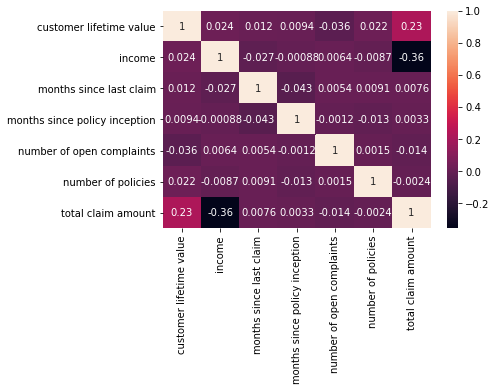

In [33]:
sns_plot = sns.heatmap(correlations_matrix_droppremiumauto, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()